In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import os
import sys
sys.path.append(os.environ.get('PYTHONPATH', None))

In [10]:
import util

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification

## Read the Data

In [13]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=7, n_classes=2)

## Estimator Performance

* http://scikit-learn.org/stable/modules/model_evaluation.html

In [14]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                    X.astype(float), y,
                    test_size=0.4, random_state=seed())

clf = RandomForestClassifier()
m = clf.fit(X_train, y_train)
y_score = m.predict(X_test)

### Performance Measures

* http://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall07/ROC.pdf
* http://aimotion.blogspot.ca/2010/08/tools-for-machine-learning-performance.html

```
TN := True Negative
TP := True Positive
FN := False Negative
FP := False Positive

binary confusion matrix:

          y_hat
        0    |   1
-----------------------
y  0   TN    |   FP      = N
             |
   1   FN    |   TP      = P
             |  
     = N_hat |  = P_hat
------------------------
```

In [15]:
cm = confusion_matrix(y_test, y_score)
cm = cm.astype(float)
cm

array([[ 177.,   18.],
       [  17.,  188.]])

In [16]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

P = TP + FN
N = FP + TN
P_hat = TP + FP
N_hat = FN + TN

### precision, predictive value
* of those that estimator found, how many are correct?

In [17]:
PPV = TP / P_hat
PPV

0.91262135922330101

### false acceptance, Type I error rate
* of those that are actual negative, how many are incorrect?

In [18]:
type_I = FP / N
type_I

0.092307692307692313

### sensitivity, hit rate
* of those that are actual positive, how many did the estimator find?
* With higher sensitivity, fewer actual positive messages will be classified as negative.

In [19]:
sensitivity = TP / P
sensitivity

0.91707317073170735

### false rejection, Type II error rate
* of those that are actual positive, how many are incorrect?

In [20]:
type_II = FN / P
type_II

0.082926829268292687

### TPR, recall
* of those that exist, how many did estimator find?

In [21]:
TPR = recall = 1 - type_II
recall

0.91707317073170735

### specificity
* of those that are actual negative, how many are correct?

In [22]:
specificity = TN / N
specificity

0.90769230769230769

### accuracy
* of those that exist, how many did estimator get right?

In [23]:
accuracy = (TP + TN) / (P + N)
accuracy

0.91249999999999998

### classification report

In [24]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_score, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.91      0.91      0.91       195
    class 1       0.91      0.92      0.91       205

avg / total       0.91      0.91      0.91       400



### ROC

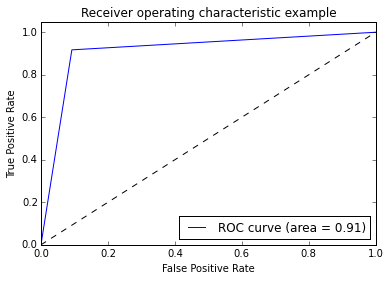

In [25]:
util.plot_roc(y_test, y_score)

### Confusion Matrix

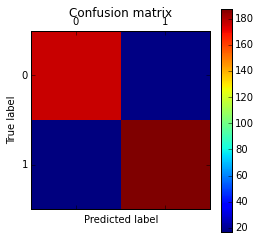

In [26]:
util.plot_confusion_matrix(y_test, y_score)